In [5]:
from util_v3 import *
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [6]:
ar = pd.read_csv('ar_processed.csv', index_col=0)
mf = pd.read_csv('mf_processed.csv', index_col=0)

In [7]:
class Portfolio_IT:
    def __init__(self, df_ar, df_mf, target_vol = 0.05):
        self.df_ar = df_ar
        self.df_mf = df_mf
        self.target_vol = target_vol

    def get_portfolio(self):
        return construct_it_portfolio(self.df_ar, self.df_mf, target_vol=self.target_vol)
class Portfolio_MP:
    def __init__(self, df_ar, df_mf, target_vol = 0.05):
        self.df_ar = df_ar
        self.df_mf = df_mf
        self.target_vol = target_vol

    def get_portfolio(self):
        return construct_mp_portfolio(self.df_ar, self.df_mf, target_vol=self.target_vol)
class Portfolio_RS:
    def __init__(self, df_ar, df_mf, target_vol = 0.05):
        self.df_ar = df_ar
        self.df_mf = df_mf
        self.target_vol = target_vol

    def get_portfolio(self):
        return construct_rs_portfolio(self.df_ar, self.df_mf, target_vol=self.target_vol)

In [ ]:
target_vol = 0.01

it = Portfolio_IT(ar, mf, target_vol=target_vol)
mp = Portfolio_MP(ar, mf, target_vol=target_vol)
rs = Portfolio_RS(ar, mf, target_vol=target_vol)
it_portfolio = it.get_portfolio()
mp_portfolio = mp.get_portfolio()
rs_portfolio = rs.get_portfolio()

it_returns = it_portfolio['returns']
mp_returns = mp_portfolio['returns']
rs_returns = rs_portfolio['returns']

# it_portfolio['cumulative_returns'] = it_returns.cumsum()
# mp_portfolio['cumulative_returns'] = mp_returns.cumsum()
# rs_portfolio['cumulative_returns'] = rs_returns.cumsum()

# plt.plot(it_returns.index, it_returns, label='IT Portfolio', color='blue')


UK
JP
EU
HK
CH
CA
AU
NZ
US


In [15]:
returns_df = pd.DataFrame({
    'IT Portfolio': it_returns,
    'MP Portfolio': mp_returns,
    'RS Portfolio': rs_returns
})
returns_df.to_csv('portfolio_returns.csv')

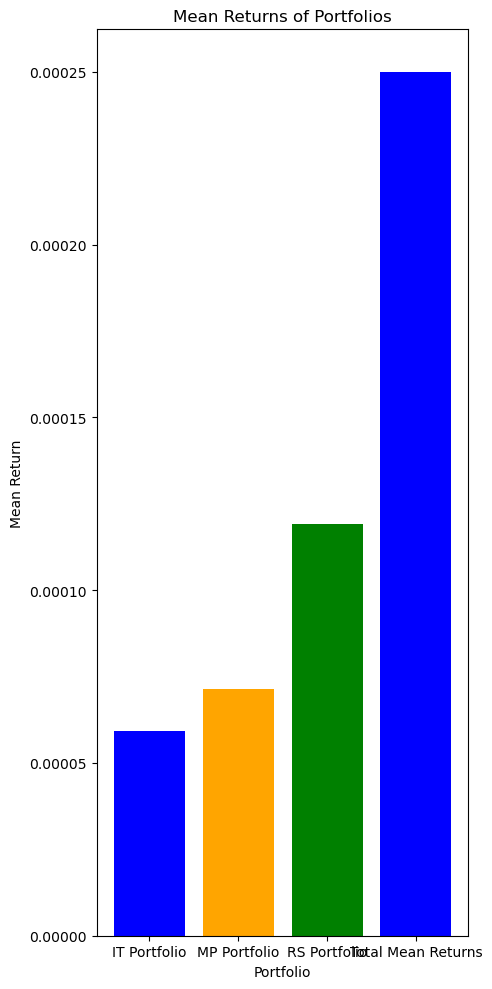

In [27]:
rs_mean_returns = rs_returns.mean()
mp_mean_returns = mp_returns.mean()
it_mean_returns = it_returns.mean()
total_mean_returns = rs_mean_returns + mp_mean_returns + it_mean_returns
plt.figure(figsize=(5,10))      
plt.bar(['IT Portfolio', 'MP Portfolio', 'RS Portfolio', 'Total Mean Returns'],
        [it_mean_returns, mp_mean_returns, rs_mean_returns, total_mean_returns],
        color=['blue', 'orange', 'green'])
plt.title('Mean Returns of Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Mean Return')
plt.tight_layout()
plt.savefig('mean_returns.png')

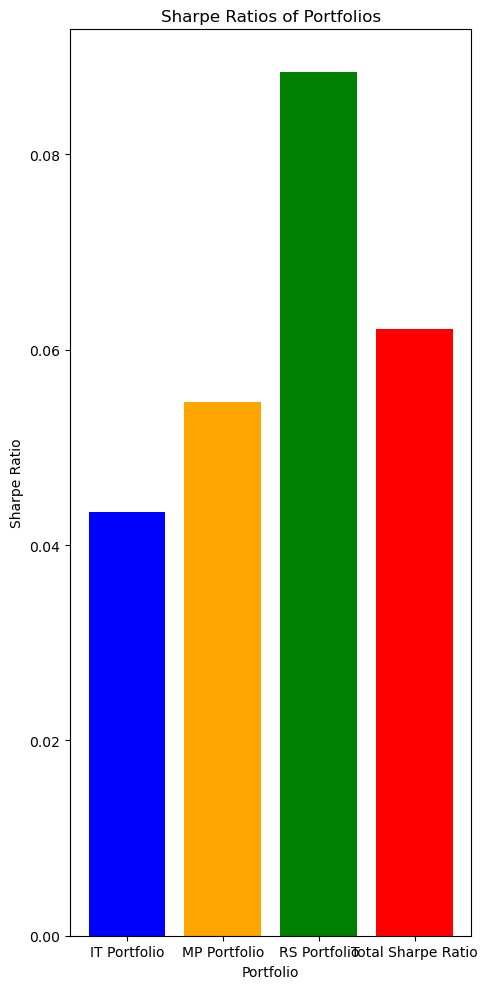

In [28]:
rs_sharpe_ratio = rs_returns.mean() / rs_returns.std()
mp_sharpe_ratio = mp_returns.mean() / mp_returns.std()
it_sharpe_ratio = it_returns.mean() / it_returns.std()
total_sharpe_ratio = (rs_mean_returns + mp_mean_returns + it_mean_returns) / \
                     (rs_returns.std() + mp_returns.std() + it_returns.std())
plt.figure(figsize=(5,10))
plt.bar(['IT Portfolio', 'MP Portfolio', 'RS Portfolio', 'Total Sharpe Ratio'],
        [it_sharpe_ratio, mp_sharpe_ratio, rs_sharpe_ratio, total_sharpe_ratio],
        color=['blue', 'orange', 'green', 'red'])
plt.title('Sharpe Ratios of Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.tight_layout()
plt.savefig('sharpe_ratios.png')

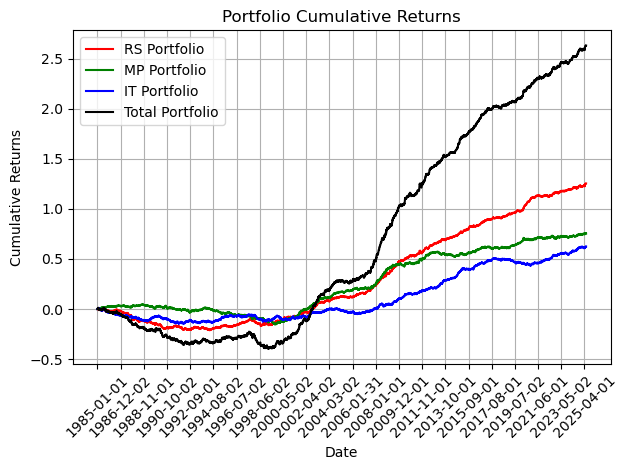

In [20]:
dates = it_returns.index
plt.plot(dates, rs_returns.values.cumsum(), label='RS Portfolio', color='red')
plt.plot(dates, mp_returns.values.cumsum(), label='MP Portfolio', color='green')
plt.plot(dates, it_returns.values.cumsum(), label='IT Portfolio', color='blue')
total_returns = it_returns + mp_returns + rs_returns
plt.plot(dates, total_returns.values.cumsum(), label='Total Portfolio', color='black')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Cumulative Returns')
plt.legend()
plt.xticks(dates[::500], rotation=45)
plt.tight_layout()
plt.grid()
plt.savefig('portfolio_cumulative_returns.png')
# plt.show()

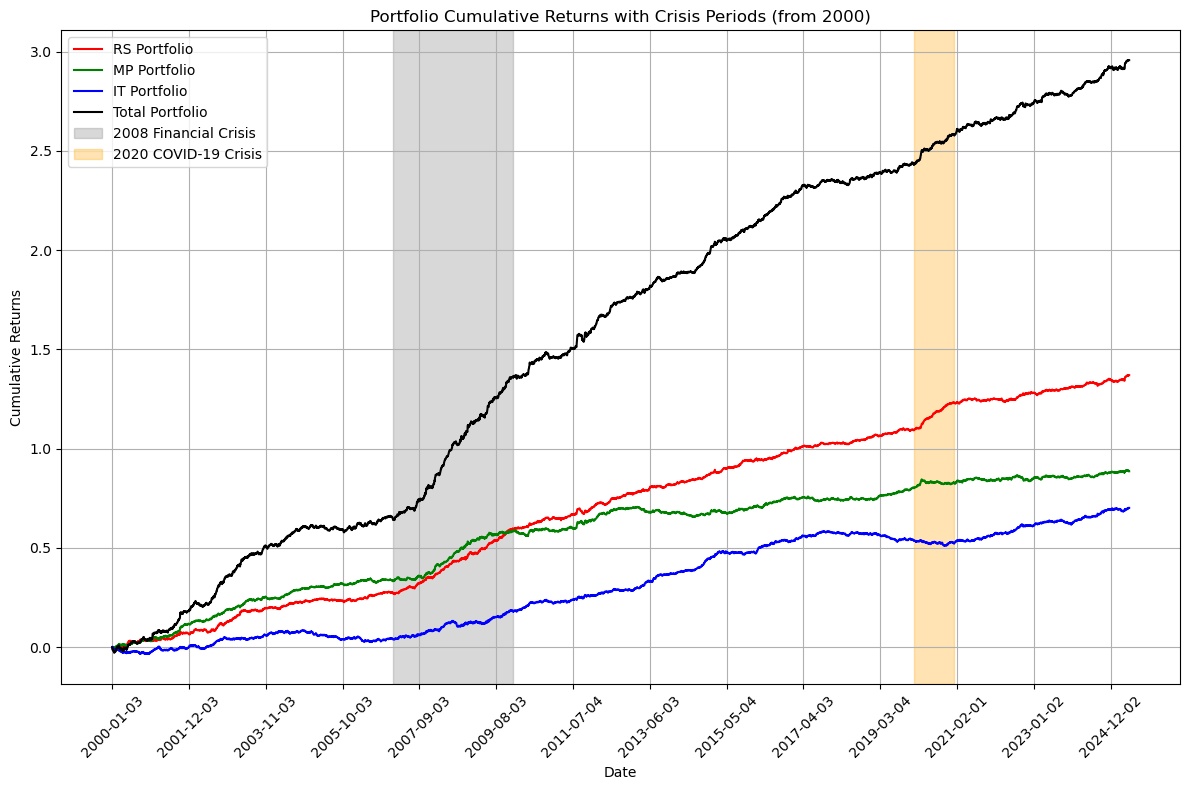

In [34]:
# Create the cumulative returns plot with shaded areas for 2008 and 2020 crisis periods
plt.figure(figsize=(12, 8))

# Filter data from 2000 onwards
start_date = '2000-01-01'
dates_filtered = dates[dates >= start_date]
rs_returns_filtered = rs_returns[rs_returns.index >= start_date]
mp_returns_filtered = mp_returns[mp_returns.index >= start_date]
it_returns_filtered = it_returns[it_returns.index >= start_date]

plt.plot(dates_filtered, rs_returns_filtered.values.cumsum(), label='RS Portfolio', color='red')
plt.plot(dates_filtered, mp_returns_filtered.values.cumsum(), label='MP Portfolio', color='green')
plt.plot(dates_filtered, it_returns_filtered.values.cumsum(), label='IT Portfolio', color='blue')
total_returns_filtered = it_returns_filtered + mp_returns_filtered + rs_returns_filtered
plt.plot(dates_filtered, total_returns_filtered.values.cumsum(), label='Total Portfolio', color='black')

# Add shaded areas for crisis periods
# 2008 Financial Crisis (approximately 2007-2009)
plt.axvspan('2007-01-01', '2009-12-31', alpha=0.3, color='gray', label='2008 Financial Crisis')

# 2020 COVID-19 Crisis (approximately 2020)
plt.axvspan('2020-01-01', '2020-12-31', alpha=0.3, color='orange', label='2020 COVID-19 Crisis')

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Cumulative Returns with Crisis Periods (from 2000)')
plt.legend()
plt.xticks(dates_filtered[::500], rotation=45)
plt.tight_layout()
plt.grid()
plt.savefig('portfolio_cumulative_returns_with_crisis_from_2000.png')
plt.show()

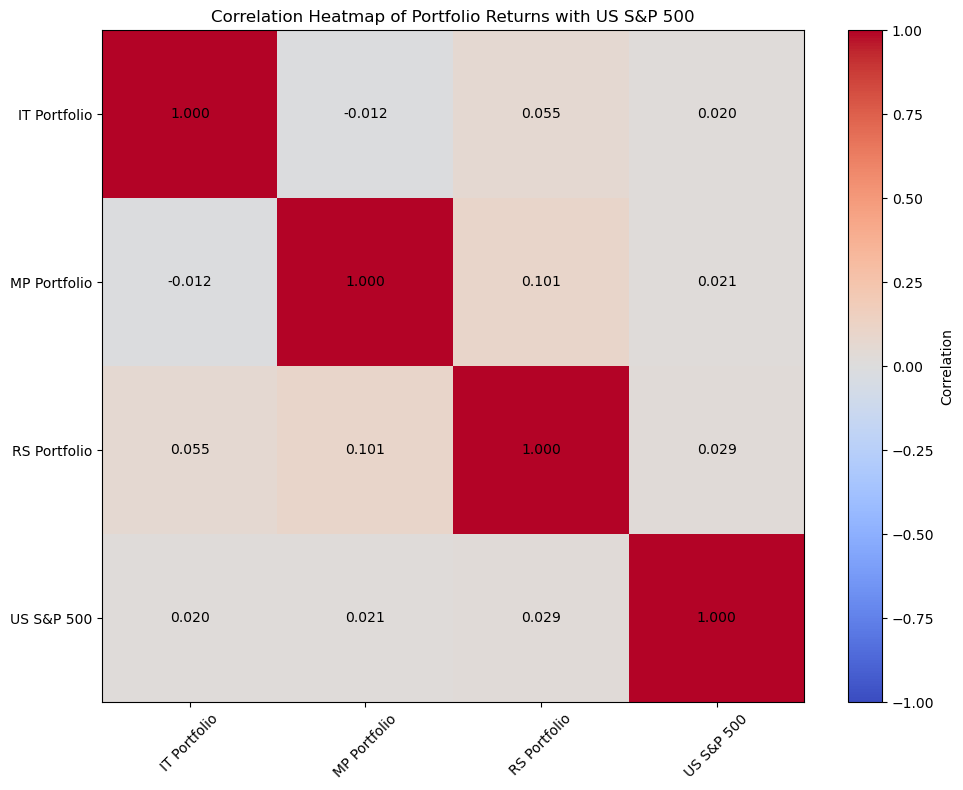

In [32]:
# Add US S&P 500 to the returns dataframe for correlation analysis
us_snp = ar['Equity_US']
returns_with_snp = returns_df.copy()
returns_with_snp['US S&P 500'] = us_snp

# Calculate correlation matrix including US S&P 500
correlation_matrix_with_snp = returns_with_snp.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix_with_snp, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix_with_snp.columns)), correlation_matrix_with_snp.columns, rotation=45)
plt.yticks(range(len(correlation_matrix_with_snp.index)), correlation_matrix_with_snp.index)
plt.title('Correlation Heatmap of Portfolio Returns with US S&P 500')
for i in range(len(correlation_matrix_with_snp.index)):
    for j in range(len(correlation_matrix_with_snp.columns)):
        plt.text(j, i, f'{correlation_matrix_with_snp.iloc[i, j]:.3f}', 
                ha='center', va='center', fontsize=10)
plt.tight_layout()
plt.savefig('portfolio_correlation_heatmap_with_snp.png')
plt.show()